<a href="https://colab.research.google.com/github/Kullaporn/Geodatasci/blob/master/6030803221_Kullaporn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pandas

# Pandas

In [47]:
import pandas as pd

In [48]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1CWpzEEJzRoDJRB7pYxNknooQTgb17vrl' #copy from link
downloaded = drive.CreateFile({'id': file_id})

In [49]:
# Download the file to a local disk as 'exported.xlsx'.
downloaded.GetContentFile('Fire_Data.xlsx')

# Set name as df

In [50]:
df = pd.read_excel('Fire_Data.xlsx')

# Check the data type of all columns

In [51]:
df.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

# Time in hh:mm

In [52]:
df['ACQ_TIME'] = (df['ACQ_TIME']/100).astype(str)

In [54]:
df['ACQ_TIME'] = df['ACQ_TIME'].str.replace('.',':',regex=True)

# Check the data type of all columns

In [55]:
df.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME              object
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

# Display ACQ_TIME columns


In [56]:
df['ACQ_TIME']

0         6:35
1         6:35
2         6:35
3         6:35
4         6:35
         ...  
79229    20:03
79230    20:03
79231    20:03
79232    20:03
79233    20:03
Name: ACQ_TIME, Length: 79234, dtype: object

# Datetime

In [59]:
df['datetime'] = pd.to_datetime(df['ACQ_DATE'].astype(str)+' '+df['ACQ_TIME'])

# Check the data type of all columns

In [60]:
df.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME              object
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
datetime      datetime64[ns]
dtype: object

# Display data 5 days

In [79]:
df['ACQ_DATE'].unique()[:5]

array(['2019-12-01T00:00:00.000000000', '2019-12-02T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-12-04T00:00:00.000000000',
       '2019-12-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [99]:
f_day=[(df['ACQ_DATE'] == '2019-12-01')|(df['ACQ_DATE'] == '2019-12-02')|(df['ACQ_DATE'] == '2019-12-03')|(df['ACQ_DATE'] == '2019-12-04')|(df['ACQ_DATE'] == '2019-12-05')]

# Time Converting


In [138]:
df['Con_Time'] = pd.to_datetime(df['datetime'] ,unit='s' ,origin='unix').astype(int)/10**10

In [139]:
mina = df['Con_Time'].min()

In [140]:
df['Con_Time'] = df['Con_Time']-mina

In [141]:
df['Con_Time']

0              0.0
1              0.0
2              0.0
3              0.0
4              0.0
           ...    
79229    1084848.0
79230    1084848.0
79231    1084848.0
79232    1084848.0
79233    1084848.0
Name: Con_Time, Length: 79234, dtype: float64

# Plot

In [142]:
import matplotlib.pyplot as plt

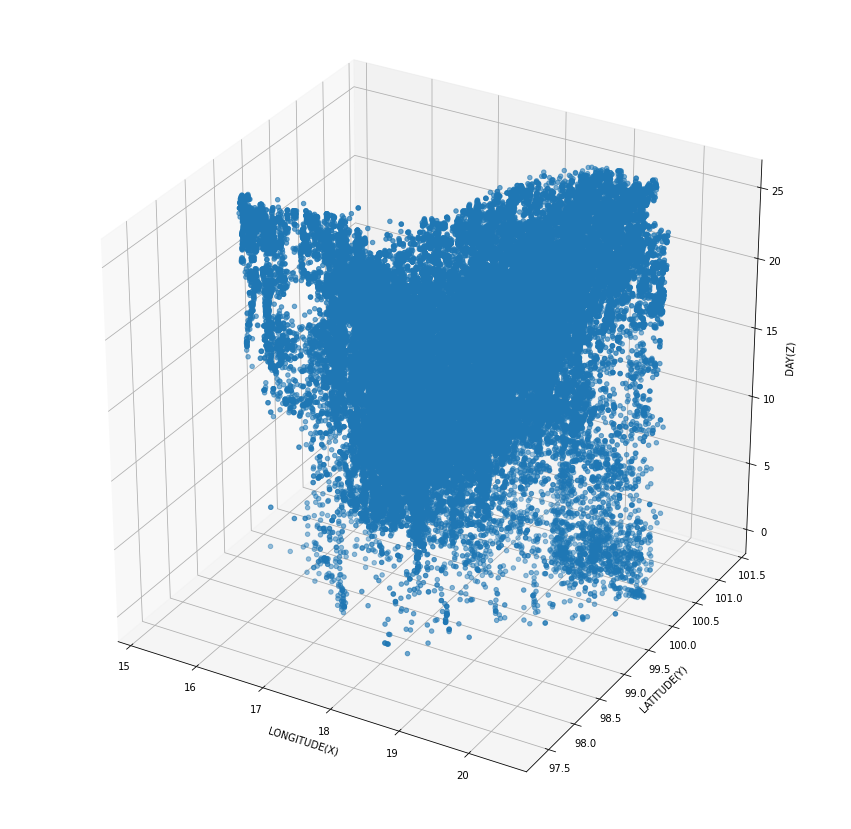

In [145]:
graph = plt.figure(figsize = (15,15)).gca(projection='3d')
graph.scatter(df.LATITUDE, df.LONGITUDE, df.int_ACQ_TIME/43200)
graph.set_xlabel('LONGITUDE(X)')
graph.set_ylabel('LATITUDE(Y)')
graph.set_zlabel('DAY(Z)')
plt.show()